# Tasca M4 T01

    Utilitzant les biblioteques de visualització de dades Matplotlib o Seaborn, realitza els següents exercicis.

     RECORDA

    En la ciència de dades una de les tasques més importants és l'anàlisi. Una gràfica sempre ha d'anar acompanyada d'una explicació d'aquesta. Aporta informació.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [53]:
df = pd.read_csv('C:/Users/Patricia/Downloads/preu lloguer per trimestre i barri.csv', header=0)

In [54]:
import os
carpeta = "C:/Users/Patricia/Documents/DATASCIENCE/M4T01EX2"
ruta_notebook = os.getcwd()
ruta_carpeta = os.path.join(ruta_notebook, carpeta)
if not os.path.exists(ruta_carpeta):
    os.makedirs(ruta_carpeta)

## Exercici 1

- Exercici 1
Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

Una variable categòrica (Districte o Barri)
Una variable numèrica (Preu)
Una variable numèrica i una categòrica (Districte i Preu)
Dues variables numèriques (Any o Trimestre i Preu)
Tres variables (Barri o Districte, Trimestre i Preu)

In [55]:
df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [56]:
df.describe(include='all')

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
count,584.0,584.000000,584.000000,584,584.000000,584,584,584
unique,NaN,NaN,NaN,10,NaN,73,2,331
top,NaN,NaN,NaN,Nou Barris,NaN,el Raval,Lloguer mitjà mensual (Euros/mes),--
freq,NaN,NaN,NaN,104,NaN,8,292,44
mean,2021.0,2.500000,6.246575,NaN,37.000000,NaN,NaN,NaN
std,0.0,1.118992,2.790726,NaN,21.089371,NaN,NaN,NaN
min,2021.0,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,2021.0,1.750000,4.000000,NaN,19.000000,NaN,NaN,NaN
50%,2021.0,2.500000,7.000000,NaN,37.000000,NaN,NaN,NaN
75%,2021.0,3.250000,8.000000,NaN,55.000000,NaN,NaN,NaN


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


    sembla ser que tenim un problema a Preu perquè ha de ser float, primer va donar un error perquè hi havien valors que apareixien com '--' llavors hem de subsitituir-hos per NaN i després eliminar-los

In [58]:
df['Preu'] = df['Preu'].replace('--', np.nan)

In [59]:
df.dropna(inplace=True)

In [60]:
df = df.astype({'Preu':'float'})

    Primer vaig voler fer-ho amb el nom del barri però la distribució era totalmente uniform llavors desprès d'una estona provant vaig revisar la taula de frecuències i em vaig assebentar de que no era un tema del gràfic sinò de les dades

In [61]:
frecuencias = df['Nom_Barri'].value_counts().reset_index()
frecuencias.columns = ['Nom_Barri', 'Frecuencia']
print(frecuencias)

                             Nom_Barri  Frecuencia
0                             el Raval           8
1                  el Turó de la Peira           8
2                     la Trinitat Nova           8
3                       la Prosperitat           8
4                               Verdun           8
..                                 ...         ...
63                            la Salut           8
64                   la Vila de Gràcia           8
65  el Camp d'en Grassot i Gràcia Nova           8
66                    el Baix Guinardó           8
67                       Baró de Viver           4

[68 rows x 2 columns]


    Llavors els gràfics sortien així

In [62]:
# Vaig establir una paleta per a que es vegin bonicos
sns.set_palette("flare")

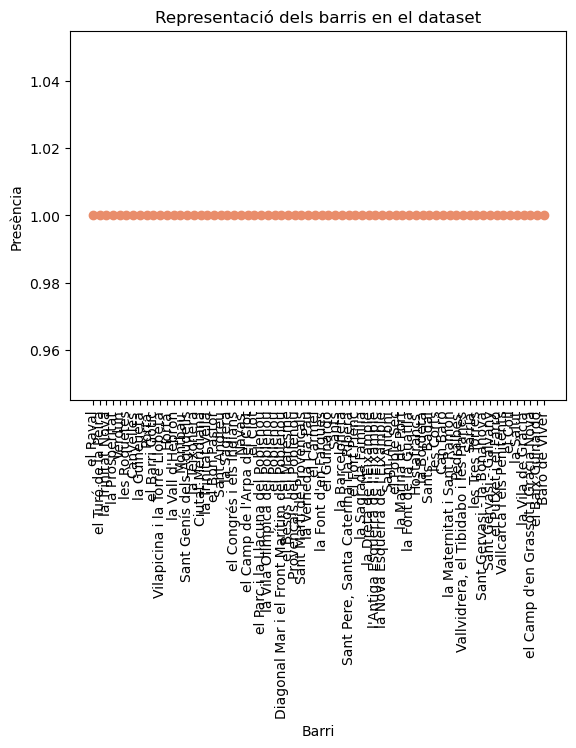

In [63]:
import matplotlib.pyplot as plt

barri_counts = df['Nom_Barri'].value_counts()

plt.plot(barri_counts.index, [1] * len(barri_counts), marker='o')
plt.xlabel('Barri')
plt.ylabel('Presència')
plt.title('Representació dels barris en el dataset')
plt.savefig('C:/Users/Patricia/Documents/DATASCIENCE/M4T01EX2/graph1.png', dpi=300)
plt.xticks(rotation=90)
plt.show()

### Representació de una variable categòrica = Districte

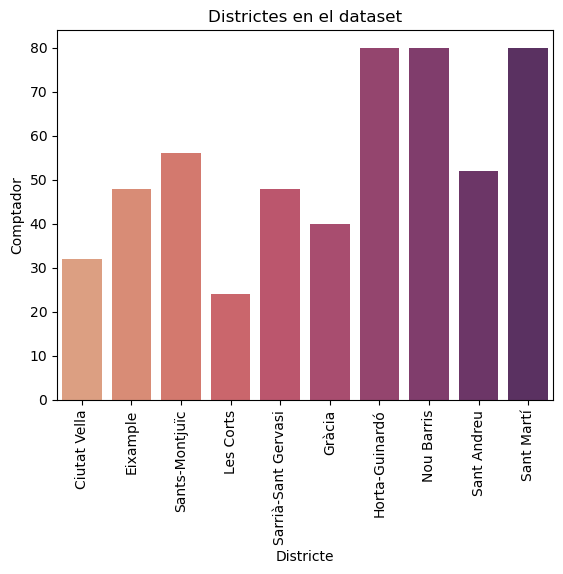

In [64]:
sns.countplot(data=df, x='Nom_Districte', palette='flare')
plt.xlabel('Districte')
plt.ylabel('Comptador')
plt.title('Districtes en el dataset')
plt.savefig('C:/Users/Patricia/Documents/DATASCIENCE/M4T01EX2/graph2.png', dpi=300)
plt.xticks(rotation=90)
plt.show()

### Representació d'una variable numèrica = Preu

    també hi han valors que clarament han de ser erros si ho analicem contextualmente de saber-hi que son lloguers trimetrals, llavors treurem tots el valors menors a 19

In [65]:
print(sorted(df['Preu'].unique(), reverse=False))

[6.7, 8.1, 8.7, 9.0, 9.2, 9.3, 9.4, 9.5, 9.9, 10.0, 10.1, 10.2, 10.4, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.9, 17.3, 18.0, 447.5, 488.1, 520.2, 546.8, 547.7, 557.0, 585.0, 592.4, 598.6, 605.0, 605.5, 608.7, 610.4, 616.7, 625.1, 626.6, 628.7, 631.6, 643.6, 644.1, 647.7, 648.9, 653.2, 653.5, 658.9, 664.2, 666.6, 667.6, 668.8, 669.5, 671.8, 673.8, 675.7, 679.3, 680.9, 681.8, 683.8, 683.9, 686.3, 687.2, 691.6, 691.9, 696.8, 698.3, 698.5, 700.5, 700.8, 704.2, 707.2, 712.8, 713.8, 716.1, 728.2, 729.9, 734.9, 736.1, 736.5, 737.4, 739.7, 740.4, 740.8, 741.1, 741.4, 741.9, 744.2, 745.4, 745.9, 747.4, 747.5, 751.9, 752.0, 752.9, 753.7, 754.0, 754.4, 754.5, 754.9, 755.5, 756.9, 757.2, 757.7, 759

In [66]:
df = df[df['Preu'] >= 19]

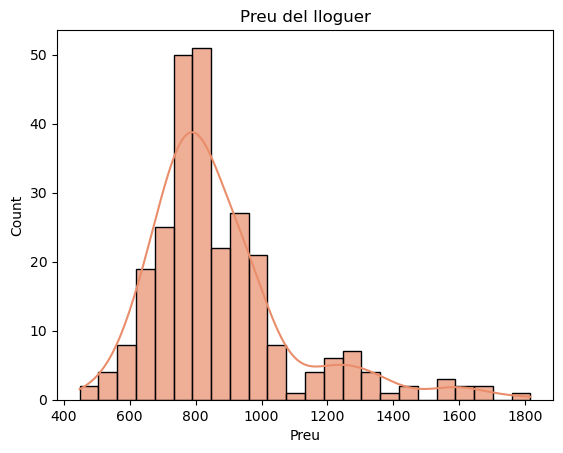

In [67]:
sns.histplot(data=df, x="Preu",kde=True, alpha = 0.70)
plt.title('Preu del lloguer')
plt.savefig('C:/Users/Patricia/Documents/DATASCIENCE/M4T01EX2/graph3.png', dpi=300)
plt.show()

 ### Una variable numèrica i una categòrica (Districte i Preu) 

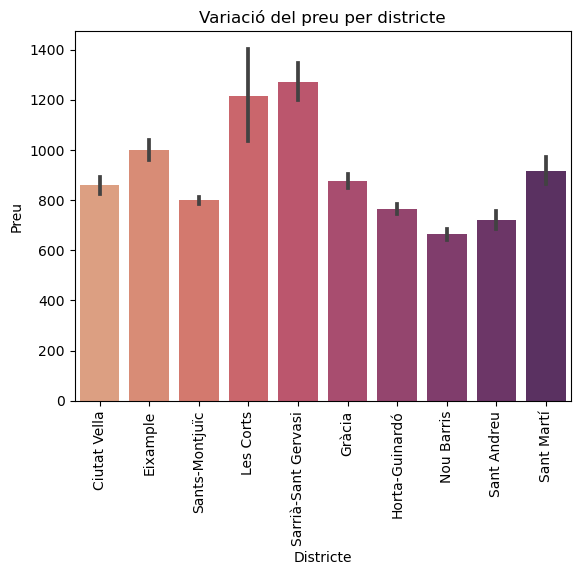

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='Nom_Districte', y='Preu', palette="flare")
plt.xlabel('Districte')
plt.ylabel('Preu')
plt.title('Variació del preu per districte')
plt.savefig('C:/Users/Patricia/Documents/DATASCIENCE/M4T01EX2/graph4.png', dpi=300)
plt.xticks(rotation=90)
plt.show()

### Dues variables numèriques (Any o Trimestre i Preu) 

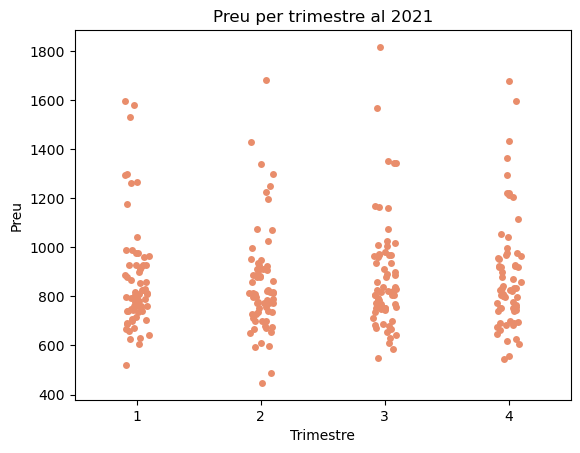

In [69]:
sns.stripplot(data=df, x='Trimestre', y='Preu')
plt.xlabel('Trimestre')
plt.ylabel('Preu')
plt.title('Preu per trimestre al 2021')
plt.savefig('C:/Users/Patricia/Documents/DATASCIENCE/M4T01EX2/graph5.png', dpi=300)
plt.show()

### Tres variables (Barri o Districte, Trimestre i Preu)

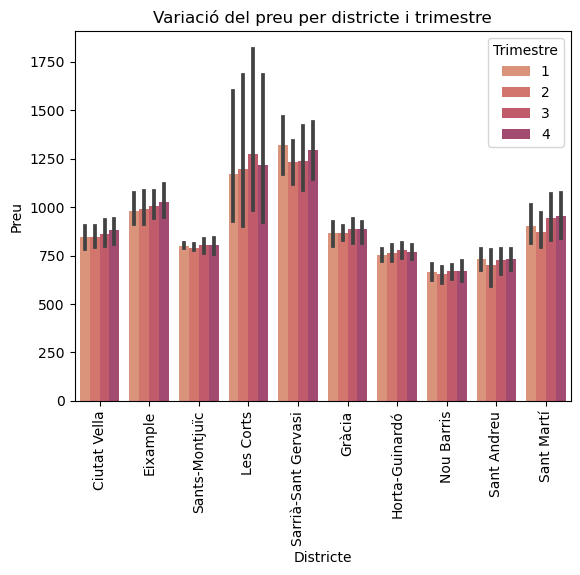

In [71]:
sns.barplot(data=df, x="Nom_Districte", y="Preu", hue="Trimestre")
plt.xlabel('Districte')
plt.ylabel('Preu')
plt.title('Variació del preu per districte i trimestre')
plt.xticks(rotation=90)
plt.legend(title='Trimestre')
plt.savefig('C:/Users/Patricia/Documents/DATASCIENCE/M4T01EX2/graph6.png', dpi=300)
plt.show()

## Exercici 2

Exporta els gràfics com imatges o com HTML

    Per a exportar no més els gràfics el millor és afegir

In [72]:
# plt.savefig('nomgrafic.png', dpi=300)

També he volgut agregar que es creï una carpeta en la qual es vagin posant totes les imatges, aquí ho deixo però no es pot executar després de creats el gràfics llavors el següent tindrà # per evitar que s'executi però abans de l'exercici 1 està executat, així mateix s'ha agregat plot.savefig en les figures de l'exercici anterior.

In [73]:
# import os
# carpeta = "C:/Users/Patricia/Documents/DATASCIENCE/M4T01EX2"
# ruta_notebook = os.getcwd()
# ruta_carpeta = os.path.join(ruta_notebook, carpeta)
# if not os.path.exists(ruta_carpeta):
    # os.makedirs(ruta_carpeta)

### Alguna visualització adicional

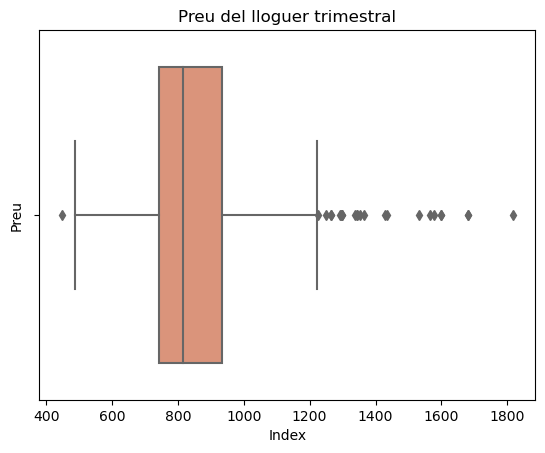

In [74]:
sns.boxplot(x=df["Preu"])
plt.xlabel('Index')
plt.ylabel('Preu')
plt.title('Preu del lloguer trimestral')
plt.show()

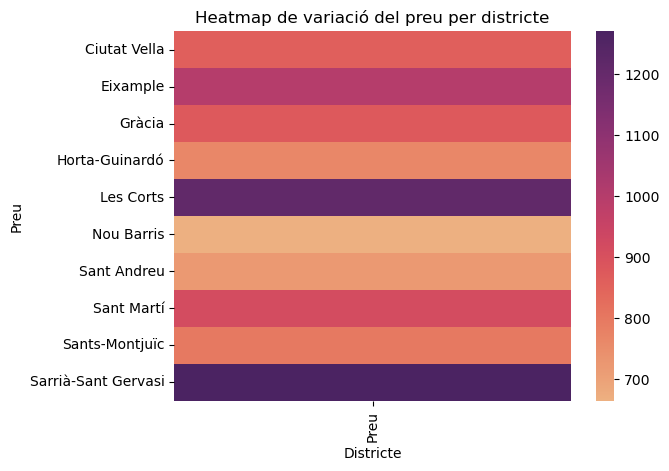

In [75]:
pivot_table = df.pivot_table(values='Preu', index='Nom_Districte', aggfunc='mean')

sns.heatmap(data=pivot_table, cmap='flare')
plt.xlabel('Districte')
plt.ylabel('Preu')
plt.title('Heatmap de variació del preu per districte')
plt.xticks(rotation=90)
plt.show()

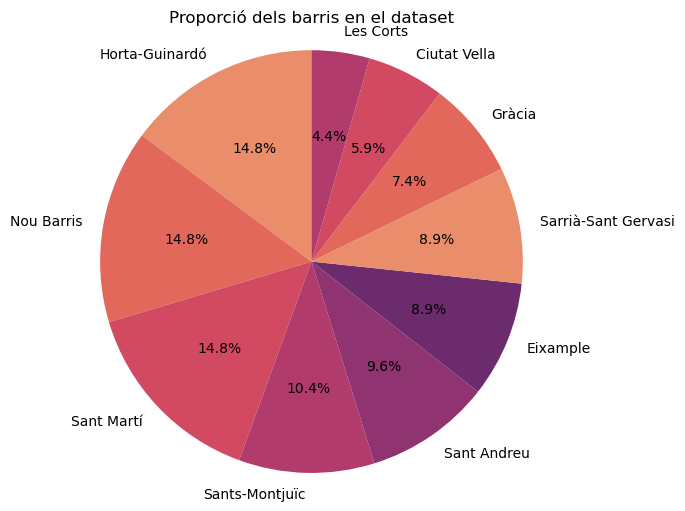

In [76]:
barri_counts = df['Nom_Districte'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(barri_counts, labels=barri_counts.index, startangle=90, autopct='%1.1f%%')
plt.title('Proporció dels barris en el dataset')
plt.axis('equal')
plt.show()

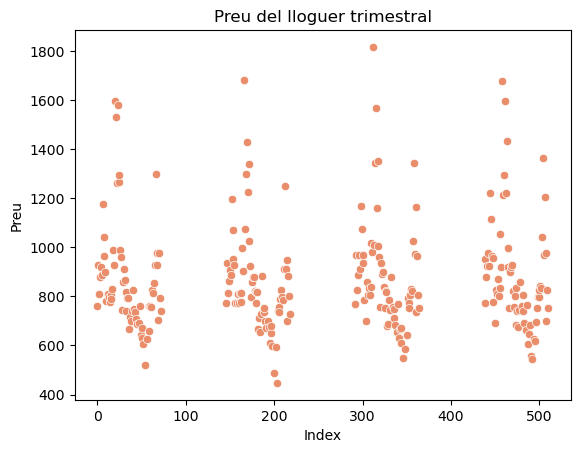

In [77]:
sns.scatterplot(data=df, x=df.index, y='Preu')

plt.xlabel('Index')
plt.ylabel('Preu')
plt.title('Preu del lloguer trimestral')
plt.show()

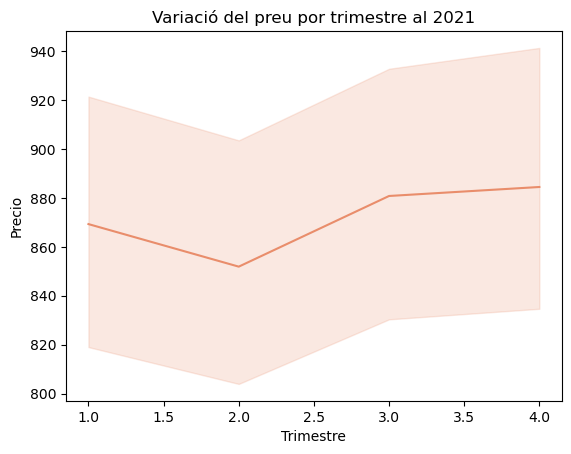

In [78]:
sns.lineplot(data=df, x='Trimestre', y='Preu')
plt.xlabel('Trimestre')
plt.ylabel('Precio')
plt.title('Variació del preu por trimestre al 2021')
plt.show()

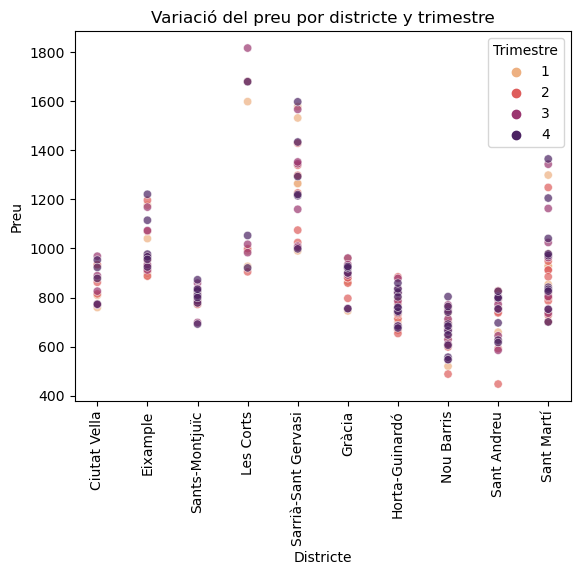

In [79]:
sns.scatterplot(data=df, x="Nom_Districte", y="Preu", hue="Trimestre", alpha = 0.70, palette="flare")
plt.xlabel('Districte')
plt.ylabel('Preu')
plt.title('Variació del preu por districte y trimestre')
plt.xticks(rotation=90)
plt.show()